# PyTorch Neural Networks

[PyTorch](https://pytorch.org/) is a Python package for defining and training neural networks.  Neural networks and deep learning have been a hot topic for several years, and are the tools underlying many state-of-the art machine learning tasks.  There are many industrial applications (e.g. at your favorite or least favorite companies in Silicon Valley), but also many scientific applications including
* Processing data in particle detectors
* Seismic imaging / medical imaging
* Accelerating simulations of physical phenomena
* ...

A (deep) feed-forward neural network is the composition of functions
\begin{equation}
f_N(x; w_N, b_N) \circ f_{N-1}(x; w_{N-1}, b_{N-1}) \circ \dots f_0(x; w_0, b_0)
\end{equation}
where each $f_i(x; w_i, b_i)$ is a (non-linear) function with learnable parameters $w_i, b_i$.  There are many choices for what the exact function is.  A common and simple one to describe is an (affine) linear transformation followed by a non-linearity.
\begin{equation}
f_i(x; w_i, b_i) = (w_i \cdot x + b_i)_+
\end{equation}

where $w_i \cdot x$ is matrix-vector multiplication, and $(\cdot)_+$ is the ReLU operation (Rectified Linear Unit)
\begin{equation}
x_+ = \begin{cases}
x & x > 0\\
0 & x \le 0
\end{cases}
\end{equation}

If you take the composition of several functions like this, you have a multilayer perceptron (MLP).


## Deep Learning Libraries

There are many deep learning libraries available, the most common ones for python are

- TensorFlow, Keras
- PyTorch

Working with tensorflow requires going into lot of details of the contruction of the computation graph, whereas Keras is a higher level interface for tensorflow. Tensorflow is very popular in the industry and good for production code.

PyTorch can be used as low level interface, but is much more user-friendly than tensorflow, but it also has a higher level interface. Pytorch is more popular in the research community.

### Main features that any deep learning library should provide

No matter what library or language you use, the main features provided by a deep learning library are 
1. Use the GPU to speed up computation 
2. Ability to do automatic differentiation
3. Useful library functions for common architectures and optimization algorithms

### PyTorch
We will look at all of the above in pytorch.
The best way to think about pytorch is that its numpy + GPU + autograd.

You can install it with

```conda install pytorch```.

Alternatively (and recommended), run this notebook in Google Colab-- it provides an environment with all of the PyTorch dependencies plus a GPU free of charge.

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
torch.__version__

'1.7.0'

## Automatic Differentiation

[Automatic differentiation](https://en.wikipedia.org/wiki/Automatic_differentiation) is different from numerical differentiation, which requires a choice of step size, and symbolic differentiation which creates a single expression for a derivative.  Instead it performs chain rule repeatedly.

PyTorch uses dynamic computation graphs to compute the gradients of the parameters.

In [2]:
x = torch.tensor([2.0])
m = torch.tensor([5.0], requires_grad = True)
c = torch.tensor([2.0], requires_grad = True)

In [3]:
y = m*x + c
y

tensor([12.], grad_fn=<AddBackward0>)

Define an error for your function

In [4]:
loss = torch.norm( y - 13)
loss

tensor(1., grad_fn=<CopyBackwards>)

In [5]:
m.grad

Calling `x.backward()` on any tensor forces pytorch to compute all the gradients of the tensors used to compute `x` which had the `requires_grad` flag set to `True`. The computed gradient will be stored in the `.grad` property of the tensors

In [6]:
loss.backward()

In [7]:
m.grad

tensor([-2.])

In [8]:
c.grad

tensor([-1.])

In [9]:
with torch.no_grad():
    m -= 0.01 * m.grad
    c -= 0.3 * c.grad

In [10]:
m,c

(tensor([5.0200], requires_grad=True), tensor([2.3000], requires_grad=True))

In [11]:
m.grad, c.grad

(tensor([-2.]), tensor([-1.]))

In [12]:
m.grad.zero_()
c.grad.zero_()

m.grad, c.grad

(tensor([0.]), tensor([0.]))

In [13]:
y = m*x + c
y

tensor([12.3400], grad_fn=<AddBackward0>)

In [14]:
loss = torch.norm( y - 13)
loss

tensor(0.6600, grad_fn=<CopyBackwards>)

In [15]:
loss.backward()
m.grad, c.grad

(tensor([-2.]), tensor([-1.]))

### Making it more compact

In [16]:
def model_fn(x,m,c):
    return m*x + c

def loss_fn(y,yt):
    return torch.norm(y-yt)

In [17]:
m = torch.tensor([5.0], requires_grad = True)
c = torch.tensor([2.0], requires_grad = True)

In [18]:
x = torch.tensor([2.0])
yt = torch.tensor([13.0])

In [19]:
y = model_fn(x,m,c)
loss = loss_fn(y,yt)
loss.backward()
with torch.no_grad():
    m -= 0.05 * m.grad
    c -= 0.05 * c.grad
m.grad.zero_()
c.grad.zero_()

print( f" m = {m}\n c = {c}\n y = {y}\n loss = {loss}")
#note that 'loss' indicates the loss for the previous m,c values

 m = tensor([5.1000], requires_grad=True)
 c = tensor([2.0500], requires_grad=True)
 y = tensor([12.], grad_fn=<AddBackward0>)
 loss = 1.0


Here's an explicit loop:

loss = 123.2157211303711
loss = 99.48639678955078
loss = 76.33134460449219
loss = 54.369239807128906
loss = 35.38062286376953
loss = 24.25409507751465
loss = 22.751705169677734
loss = 22.747961044311523
loss = 22.747936248779297
loss = 22.747936248779297
loss = 22.747936248779297
loss = 22.747936248779297
loss = 22.74793243408203
loss = 22.747934341430664
loss = 22.74793243408203
loss = 22.74793243408203
loss = 22.74793243408203
loss = 22.74793243408203
loss = 22.74793243408203
loss = 22.74793243408203
loss = 22.74793243408203
loss = 22.74793243408203
loss = 22.74793243408203
loss = 22.74793243408203
loss = 22.74793243408203
loss = 22.74793243408203
loss = 22.74793243408203
loss = 22.74793243408203
loss = 22.74793243408203
loss = 22.74793243408203
loss = 22.74793243408203
loss = 22.74793243408203
loss = 22.74793243408203
loss = 22.74793243408203
loss = 22.74793243408203
loss = 22.74793243408203
loss = 22.74793243408203
loss = 22.74793243408203
loss = 22.74793243408203
loss = 22.7479324

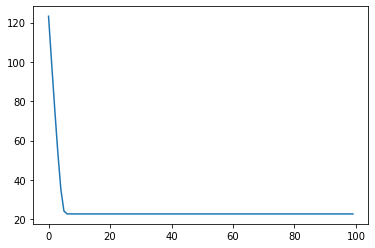

In [20]:
x = torch.randn(5,100)
yt = torch.randn(1,100)
losses = []

for i in range(100):
    y = model_fn(x,m,c)
    loss = loss_fn(y,yt)
    loss.backward()
    with torch.no_grad():
        m -= 0.05 * m.grad
        c -= 0.05 * c.grad
    m.grad.zero_()
    c.grad.zero_()

    losses+=[loss.item()]
    print( f"loss = {loss}")

plt.plot(losses);

## Using Library functions

The subpackage `torch.nn` provides an object-oriented library of functions that can be composed together.


In [21]:
model = torch.nn.Sequential(
    torch.nn.Linear(5, 5), # 5 x 5 matrix
    torch.nn.ReLU(),       # ReLU nonlinearity
    torch.nn.Linear(5, 5), # 5 x 5 matrix
)

In [22]:
list(model.parameters())

[Parameter containing:
 tensor([[ 0.3316,  0.1522,  0.2492, -0.2992,  0.4102],
         [-0.3598,  0.1222, -0.3902, -0.2934, -0.3457],
         [-0.2198,  0.2152,  0.3994, -0.3181, -0.0516],
         [-0.2023,  0.0867,  0.3717,  0.1664, -0.2102],
         [ 0.4042, -0.3993, -0.3191, -0.2141, -0.2772]], requires_grad=True),
 Parameter containing:
 tensor([-0.4013,  0.2950,  0.1151, -0.2628,  0.2941], requires_grad=True),
 Parameter containing:
 tensor([[-0.3463,  0.3572,  0.3492, -0.3008, -0.2829],
         [ 0.2310, -0.4222,  0.3614, -0.2791, -0.0441],
         [ 0.3478,  0.1490, -0.2911,  0.3047, -0.2649],
         [-0.1012,  0.0829, -0.4061,  0.2447,  0.3126],
         [ 0.2993,  0.0131,  0.1135, -0.3588,  0.2828]], requires_grad=True),
 Parameter containing:
 tensor([-0.2317, -0.3994,  0.1748,  0.2988, -0.1613], requires_grad=True)]

In [23]:
loss_fn = torch.nn.MSELoss(reduction='sum')

In this case, we'll just fit the model to random data.

In [25]:
x = torch.randn(100,5)
yt = torch.randn(100,5)
losses = []

Optimizers in `torch.optim` implement a variety of optimization strategies.  Almost all are based on gradient descent, since forming Hessians is prohibitive.

In [28]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.03)

loss = 432.11285400390625
loss = 432.1269226074219
loss = 432.1133728027344
loss = 432.1142578125
loss = 432.1257019042969
loss = 432.1229248046875
loss = 432.13800048828125
loss = 432.10772705078125
loss = 432.1046447753906
loss = 432.154541015625
loss = 432.12225341796875
loss = 432.10784912109375
loss = 432.1551513671875
loss = 432.1158142089844
loss = 432.1353454589844
loss = 432.1211242675781
loss = 432.1257019042969
loss = 432.11083984375
loss = 432.12322998046875
loss = 432.0851745605469
loss = 432.0941162109375
loss = 432.1318054199219
loss = 432.1329345703125
loss = 432.130859375
loss = 432.1982116699219
loss = 432.1083679199219
loss = 432.2474060058594
loss = 432.24249267578125
loss = 432.15167236328125
loss = 432.2353515625
loss = 432.1801452636719
loss = 432.15069580078125
loss = 432.195068359375
loss = 432.19140625
loss = 432.1322021484375
loss = 432.28363037109375
loss = 432.14068603515625
loss = 432.22784423828125
loss = 432.1725769042969
loss = 432.1201171875
loss = 432

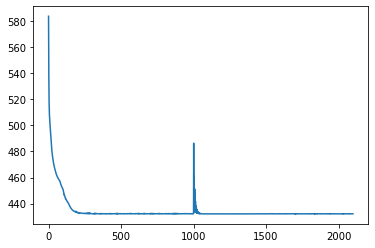

In [30]:
for i in range(100):
    y = model(x)
    loss = loss_fn(y,yt)
    loss.backward()

    optimizer.step()
    optimizer.zero_grad()

    losses+=[loss.item()]
    print( f"loss = {loss}")
    
plt.plot(losses);

## MNIST Example

First, you'll want to install the `torchvision` package - this is a package for PyTorch that provides a variety of computer vision functionality.

The [MNIST data set](http://yann.lecun.com/exdb/mnist/) consists of a collection of handwritten digits (0-9).  Our goal is to train a neural net which will classify the image of each digit as the correct digit

```
conda install torchvision -c pytorch
```

In [31]:
import torchvision

In [32]:
from torchvision.datasets import MNIST

In [33]:
data = MNIST(".",download=True)

In [34]:
len(data)

60000

In [35]:
import numpy as np
img,y = data[np.random.randint(1,60000)]
print(y)
img

1


In [36]:
data.train_data[2].shape

/home/brad/miniconda3/envs/pycourse/lib/python3.8/site-packages/torchvision/datasets/mnist.py:58: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


torch.Size([28, 28])

In [37]:
data.train_labels[2]

/home/brad/miniconda3/envs/pycourse/lib/python3.8/site-packages/torchvision/datasets/mnist.py:48: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


tensor(4)

### MNIST Training

In [38]:
model = torch.nn.Sequential(
    torch.nn.Linear(784, 100),
    torch.nn.ReLU(),
    torch.nn.Linear(100, 100),
    torch.nn.ReLU(),
    torch.nn.Linear(100, 10),
)

In [39]:
loss_fn = torch.nn.CrossEntropyLoss()

In [40]:
sample = np.random.choice(range(len(data.train_data)),1000)
x = data.train_data[sample].reshape(1000,-1).float()/255
yt = data.train_labels[sample]

In [41]:
x.shape,yt.shape

(torch.Size([1000, 784]), torch.Size([1000]))

In [42]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.03)
losses = []

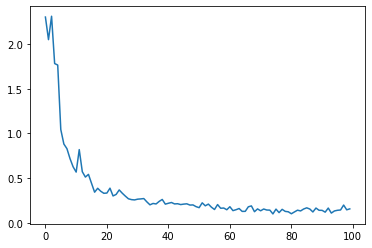

In [43]:
for i in range(100):
    
    sample = np.random.choice(range(len(data.train_data)),1000)
    x = data.train_data[sample].reshape(1000,-1).float()/255
    yt = data.train_labels[sample]
    
    y = model(x)
    loss = loss_fn(y,yt)
    loss.backward()

    optimizer.step()
    optimizer.zero_grad()

    losses+=[loss.item()]
    #print( f"loss = {loss}")
plt.plot(losses);

In [44]:
x_test = data.train_data[-1000:].reshape(1000,-1).float()/255
y_test = data.train_labels[-1000:]

In [45]:
with torch.no_grad():
    y_pred = model(x_test)

In [46]:
print("Accuracy = ", (y_pred.argmax(dim=1) == y_test).sum().float().item()/1000.0)

Accuracy =  0.978


### Credits

This notebook was adapted from a notebook from [CME 193 at Stanford](https://github.com/icme/cme193)